# Plot training curves of different experiments

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
#from meld_graph.paths import EXPERIMENT_PATH
import os
from meld_graph.experiment import Experiment, discover_trained_experiments
import numpy as np

In [54]:
# get list of trained experiments
# this function looks for trained experiments starting from EXPERIMENT_PATH
# you can also specify a subfolder to start from
#experiment_paths = discover_trained_experiments()
#exps = [Experiment.from_folder(p) for p in experiment_paths]
#print(experiment_paths)
EXPERIMENT_PATH = '/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/'
big_exp={'kernels':['23-02-08_HEZD_baseline/s_2/',
                    '23-02-06_FVDU_kernels_spiral_20/s_2',
                    '23-02-06_FVDU_kernels_gmm_3/s_2/',
                    '23-02-06_FVDU_kernels_gmm_12/s_2'],
        'augmentation':['23-02-08_HEZD_baseline/s_2/',
                        '23-02-08_HEZD_mask_augmentation/s_2',
                        '23-02-06_WHAA_large_augmentation/s_2'
                        ],
        'fine_tuning':['23-02-08_HEZD_baseline/s_2/',
                       '23-02-08_HAYI_no_finetuning/s_0/',],
        'smooth_labels':['23-02-08_HEZD_baseline/s_2/',
                '23-02-08_HEZD_smooth_labels/s_2',
                '23-02-08_HEZD_epsilon/s_2'
                 ],
                 'classification':['23-02-09_MYCZ_baseline/s_2',
    '23-02-09_MHYH_classification_deep/s_2',
                                   '23-02-09_MHYH_classification_non_deep/s_2'],
                 'distance_debug':['23-02-09_MYCZ_baseline/s_2',],
                                   }
exp_name = 'distance_debug'

experiment_paths = big_exp[exp_name].copy()
for pi,path in enumerate(experiment_paths):
    for fold in np.arange(5):
        experiment_paths[pi] = os.path.join(path,f'fold_0{fold}')
#experiment_paths = ['classification_config/fold_00']
experiment_paths = ['23-02-09_MYCZ_mask_augmentation/s_2/fold_00',
                    '23-02-09_MYCZ_mask_augmentation/s_2/fold_01',
                    '23-02-09_MYCZ_mask_augmentation/s_2/fold_02',
                    '23-02-09_MYCZ_mask_augmentation/s_2/fold_03',
                    '23-02-09_MYCZ_mask_augmentation/s_2/fold_04']

In [55]:
exps = [Experiment.from_folder(os.path.join(EXPERIMENT_PATH,p)) for p in experiment_paths]
experiment_paths

Initialised Experiment 23-02-09_MYCZ_mask_augmentation/s_2
Initialised Experiment 23-02-09_MYCZ_mask_augmentation/s_2
Initialised Experiment 23-02-09_MYCZ_mask_augmentation/s_2
Initialised Experiment 23-02-09_MYCZ_mask_augmentation/s_2
Initialised Experiment 23-02-09_MYCZ_mask_augmentation/s_2


['23-02-09_MYCZ_mask_augmentation/s_2/fold_00',
 '23-02-09_MYCZ_mask_augmentation/s_2/fold_01',
 '23-02-09_MYCZ_mask_augmentation/s_2/fold_02',
 '23-02-09_MYCZ_mask_augmentation/s_2/fold_03',
 '23-02-09_MYCZ_mask_augmentation/s_2/fold_04']

/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_mask_augmentation/s_2/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_mask_augmentation/s_2/fold_01
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_mask_augmentation/s_2/fold_02
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_mask_augmentation/s_2/fold_03
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_mask_augmentation/s_2/fold_04
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_mask_augmentation/s_2/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_mask_augmentation/s_2/fold_01
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_mask_augmentation/s_2/fold_02
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_mask_augmentation/s_2/fold_03
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_mask_augme

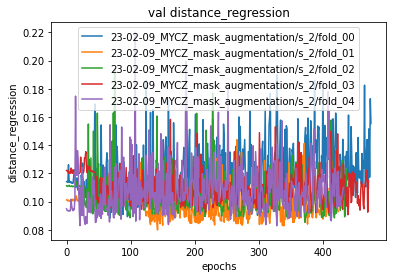

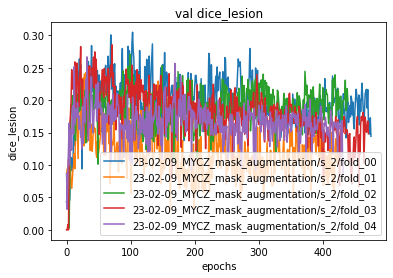

In [59]:
#import seaborn as sns
def plot_scores(exps, score='loss', split='val'):
    scores = []
    fig, ax = plt.subplots(1,1)
    stored_scores=[]
    for exp in exps:
        scores = exp.get_scores(split=split)[score]
        ax.plot(scores.index, scores, label=os.path.join(exp.experiment_name, f'fold_{exp.fold:02d}'))
        stored_scores.append(scores)
    ax.set_xlabel('epochs')
    ax.set_ylabel(score)
    ax.set_title(f'{split} {score}')
    plt.legend()
    return stored_scores

dist_l=plot_scores(exps, 'distance_regression')
dice_l=plot_scores(exps, 'dice_lesion',split='val')

##auroc=plot_scores(exps, 'cl_precision')
#auroc=plot_scores(exps, 'cl_recall')

#auroc=plot_scores(exps, 'cl_precision')

for s in auroc:
    print(max(s))
#dl=plot_scores(exps, 'lesion_classification')


In [62]:
for dice, dist in zip(dice_l,dist_l):
    print(dist[np.argmax(dice)],dice[np.argmax(dice)])

0.1044645959855583 0.3048057692206424
0.1003128320950528 0.2422897891829843
0.0885805821719417 0.2708315512408381
0.0999528994864743 0.2853840333207146
0.0844565791523327 0.2667630861472824


In [57]:
dl[0][100],dl[1][100]
0.1518119042739272/0.0012024920509682

126.24774039187548

In [30]:
#extract max aurocs across exps
exp_name='classification'
split='val'
score='auroc'
stored_scores = np.zeros((len(big_exp[exp_name]),5))
for fold in np.arange(5):
    experiment_paths = big_exp[exp_name].copy()
    for pi,path in enumerate(experiment_paths):
        experiment_paths[pi] = os.path.join(path,f'fold_0{fold}')
    exps = [Experiment.from_folder(os.path.join(EXPERIMENT_PATH,p)) for p in experiment_paths]
    for ei,exp in enumerate(exps):
        scores = exp.get_scores(split=split)[score]
        stored_scores[ei,fold]=np.max(scores)


Initialised Experiment 23-02-09_MYCZ_baseline/s_2
Initialised Experiment 23-02-09_MHYH_classification_deep/s_2
Initialised Experiment 23-02-09_MHYH_classification_non_deep/s_2
Initialised Experiment 23-02-09_MYCZ_baseline/s_2
Initialised Experiment 23-02-09_MHYH_classification_deep/s_2
Initialised Experiment 23-02-09_MHYH_classification_non_deep/s_2
Initialised Experiment 23-02-09_MYCZ_baseline/s_2


/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_baseline/s_2/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_deep/s_2/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_non_deep/s_2/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_baseline/s_2/fold_01
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_deep/s_2/fold_01
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_non_deep/s_2/fold_01


Initialised Experiment 23-02-09_MHYH_classification_deep/s_2
Initialised Experiment 23-02-09_MHYH_classification_non_deep/s_2
Initialised Experiment 23-02-09_MYCZ_baseline/s_2
Initialised Experiment 23-02-09_MHYH_classification_deep/s_2
Initialised Experiment 23-02-09_MHYH_classification_non_deep/s_2


/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_baseline/s_2/fold_02
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_deep/s_2/fold_02
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_non_deep/s_2/fold_02
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_baseline/s_2/fold_03
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_deep/s_2/fold_03


Initialised Experiment 23-02-09_MYCZ_baseline/s_2
Initialised Experiment 23-02-09_MHYH_classification_deep/s_2
Initialised Experiment 23-02-09_MHYH_classification_non_deep/s_2


/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_non_deep/s_2/fold_03
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_baseline/s_2/fold_04
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_deep/s_2/fold_04
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_non_deep/s_2/fold_04


In [31]:
np.mean(stored_scores,axis=1)

array([0.76011286, 0.74966305, 0.75022959])

Text(0.5, 1.0, 'classification')

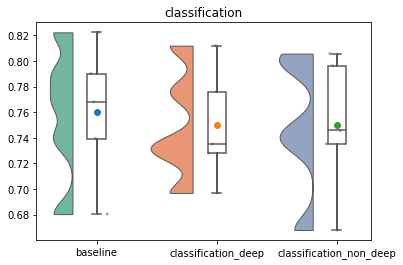

In [32]:
import ptitprince as pt
names = []
for e in experiment_paths:
    names.append(e.split("/")[0][14:])
df = pd.DataFrame(stored_scores.T,columns=names)
fig, ax = plt.subplots()
pt.RainCloud(data=df,ax=ax)
for ni,name in enumerate(names):
    plt.scatter(ni,np.mean(df[name]))
ax.set_title(exp_name)

Text(0, 0.5, 'auroc')

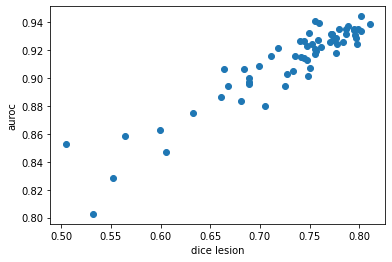

In [23]:
plt.scatter(dl[dl>0.4],auroc[dl>0.4])
plt.xlabel('dice lesion')
plt.ylabel('auroc')

Text(0, 0.5, 'auroc')

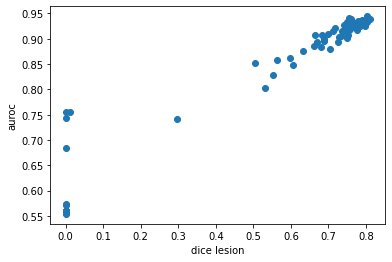

In [24]:
plt.scatter(dl,auroc)
plt.xlabel('dice lesion')
plt.ylabel('auroc')